# Probability Distribution Function

This interaction allows you to adjust the mean and variance of a normal distribution and then see how the plot changes.  Notice that the mean moves the location of the distribution while the variance changes the width.

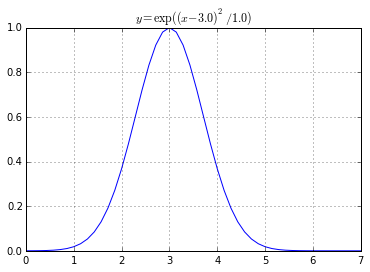

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import ipywidgets
from IPython.display import display, clear_output

mean = ipywidgets.FloatSlider(min=1, max=5, value=3, step=0.1, 
                                 description="mean")
variance = ipywidgets.FloatSlider(min=0.1, max=3, value=1.0, step=0.1,
                                 description="variance")

display(mean)
display(variance)

def plot():
    clear_output(True)
    x = np.linspace(0,7,50)
    y = np.exp(-(x-mean.value)**2/variance.value)
    plt.plot(x, y)
    plt.grid(True)
    plt.title('$y = \exp((x-{0})^2/{1})$'.format(mean.value, variance.value))

mean.on_trait_change(plot, 'value')
variance.on_trait_change(plot, 'value')
plot()

# Samples from a distribution

A next interaction would show the theoretical distribution, the histogram from samples, and then the best fit to the histogram.  This would illustrate how with more samples, the inferred distribution approaches the ideal distribution.

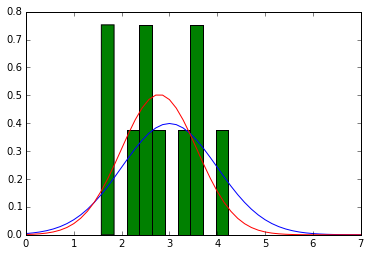

In [86]:
from scipy.stats import norm

def plot(_):
    clear_output()
    x = np.linspace(0,7,50)
    random_variates = norm.rvs(size=10, loc=mean.value, scale=variance.value)
    plt.plot(x, norm.pdf(x, loc=mean.value, scale=variance.value))
    fit_mean, fit_variance = norm.fit(random_variates)
    plt.hist(random_variates, normed=True)
    plt.plot(x, norm.pdf(x, loc=fit_mean, scale=fit_variance))
    plt.show()

resample = ipywidgets.Button(description='Resample')
display(resample)
resample.on_click(plot)
plot(_)